# Tutorial per a la Visualització de Mapes de Catalunya

Marc Bosch Manzano<br>
Octubre 2025

Libraries to process the data:
- pandas: Python Data Analysis Lybrary<br>
- geopandas: Geographyc PANDAS

Datasets:

- *seccions-censals-20240101*: Base de dades geogràfica que descriu la subdivisió dels municipis de Catalunya en districtes i seccions censals del 2024. Anar a l'enllaç https://catalegs.ide.cat/geonetwork/srv/cat/catalog.search#/metadata/seccions-censals-v1r0-20240101.

- *divisions-administratives-v2r1-20250730*: Base de dades geogràfica amb els límits geogràfics de municipis, comarques, vegueries, i províncies del 2025. Inclou un mapa de punts de municipis, els mapes que porten per nom "cap de municipi". Les escales de major a menor detall són 1:5 000 1:50 000, 1:100 000, 1:250 000, 1:500 000 i 1:1 000 000. Anar a l'enlaç https://catalegs.ide.cat/geonetwork/srv/cat/catalog.search#/metadata/divisions-administratives-v2r1-20250730.

- *dades-poblacionals-per-municipi*: Directori amb totes les dades d'habitants per municipi per anys extretes d'IDESCAT. Enllaç a https://www.idescat.cat/indicadors/?id=aec&n=15903

In [48]:
import os
import importlib
import sys
import subprocess

def install_if_missing(package):
    try:
        importlib.import_module(package)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

packages = ["pandas", "geopandas", "numpy"]

for pkg in packages:
    install_if_missing(pkg)

import numpy as np
import pandas as pd 
import geopandas as gpd

In [2]:
COLORS = ["viridis", "plasma", "inferno", "magma", "cividis"]

In [3]:
maps_directory = r"./divisions-administratives-v2r1-20250730/"

map_file_names = {}
map_file_names["MUNICIPI"] = r"divisions-administratives-v2r1-municipis-250000-20250730.shp" 
map_file_names["COMARCA"] = r"divisions-administratives-v2r1-comarques-5000-20250730.shp"
map_file_names["VEGUERIA"] = r"divisions-administratives-v2r1-vegueries-5000-20250730.shp"
map_file_names["PROVINCIA"] = r"divisions-administratives-v2r1-provincies-5000-20250730.shp"

map_file_paths = {}
for map, file_name in map_file_names.items():
    map_file_paths[map] = os.path.join(maps_directory, file_name)    

map_data = {}
for map, file_path in map_file_paths.items():
    map_data[map] = gpd.read_file(file_path)

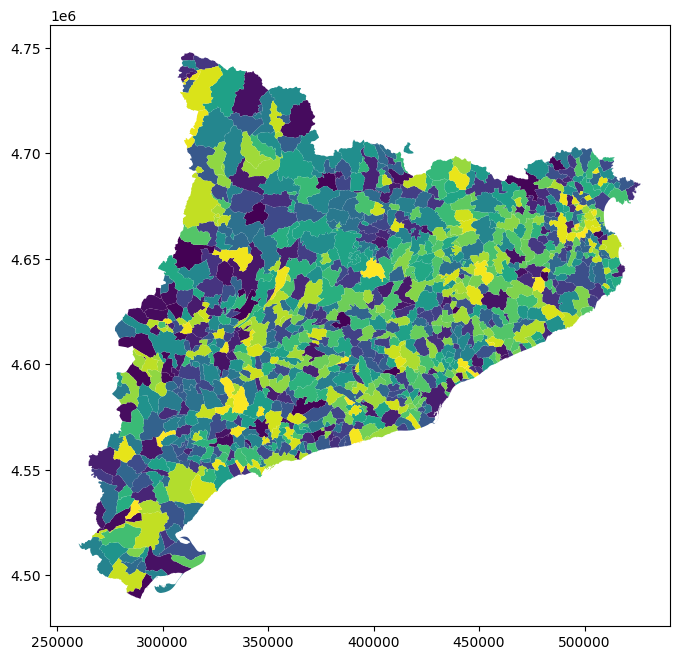

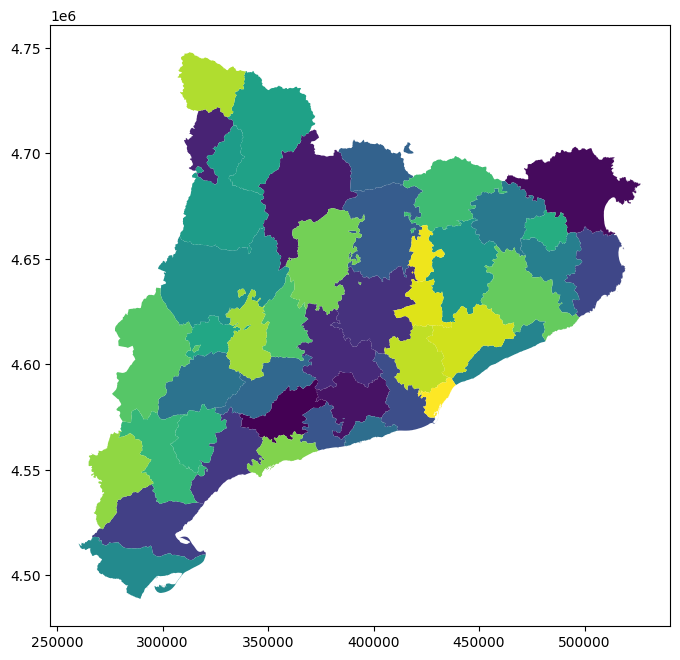

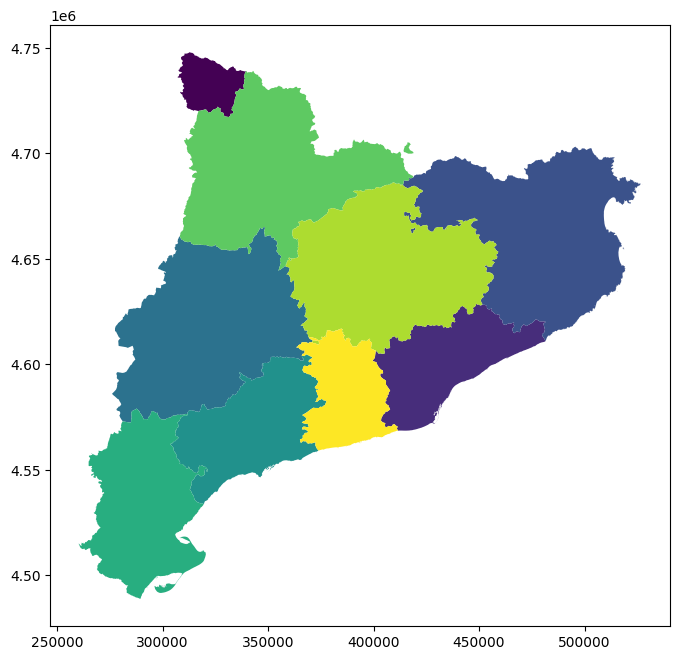

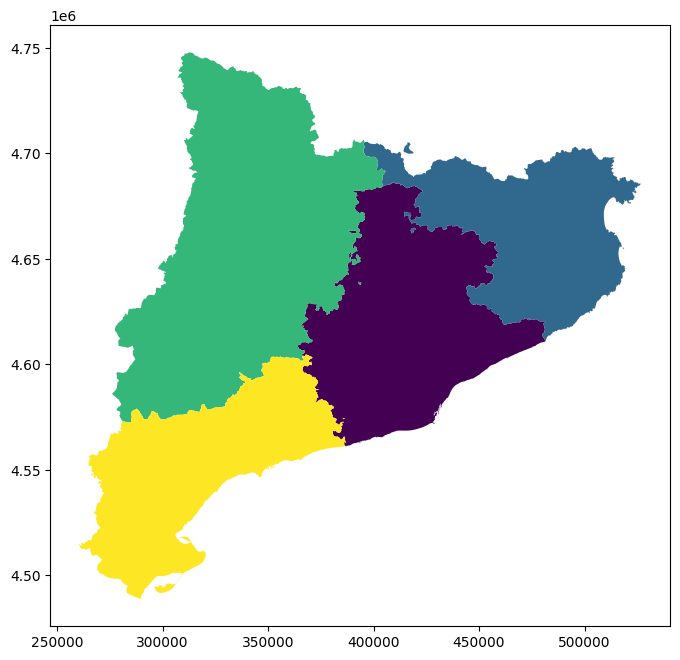

In [4]:
for data in map_data.values():
    ax = data.plot(
        cmap=COLORS[0], 
        figsize=(8, 8)
    )

In [5]:
for map, data in map_data.items():
    print(map, data.shape)
    display(data.head(5))

MUNICIPI (947, 14)


,CODIMUNI,NOMMUNI,CAPMUNI,AREAM5000,CODICOMAR,NOMCOMAR,CAPCOMAR,CODIVEGUE,NOMVEGUE,CAPVEGUE,CODIPROV,NOMPROV,CAPPROV,geometry
0,250019,Abella de la Conca,Abella de la Conca,78.1235,25,Pallars Jussà,Tremp,06,Alt Pirineu,*,25,Lleida,Lleida,"POLYGON ((346678.012 4677003.965, 346688.592 4..."
1,080018,Abrera,Abrera,19.9781,11,Baix Llobregat,Sant Feliu de Llobregat,01,Barcelona,Barcelona,08,Barcelona,Barcelona,"POLYGON ((410315.5 4598888.5, 410888.8 4598869..."
2,250024,Àger,Àger,160.2026,23,Noguera,Balaguer,03,Lleida,Lleida,25,Lleida,Lleida,"POLYGON ((308157.549 4660767.518, 308220.898 4..."
3,250030,Agramunt,Agramunt,79.3595,38,Urgell,Tàrrega,03,Lleida,Lleida,25,Lleida,Lleida,"MULTIPOLYGON (((342659.9 4635474.9, 342566.813..."
4,080023,Aguilar de Segarra,Aguilar de Segarra,43.2198,07,Bages,Manresa,07,Catalunya Central,*,08,Barcelona,Barcelona,"POLYGON ((384697.49 4625038.858, 385155.746 46..."


COMARCA (43, 5)


,CODICOMAR,NOMCOMAR,CAPCOMAR,AREAC5000,geometry
0,01,Alt Camp,Valls,537.8597,"POLYGON ((372752.7 4592940.6, 373053.7 4592711..."
1,02,Alt Empordà,Figueres,1356.9070,"MULTIPOLYGON (((518430.95 4676094.33, 518429.3..."
2,03,Alt Penedès,Vilafranca del Penedès,592.5553,"POLYGON ((384583.666 4596586.413, 384601.846 4..."
3,04,Alt Urgell,la Seu d'Urgell,1446.6785,"MULTIPOLYGON (((360797.2 4650206.6, 360960.1 4..."
4,05,Alta Ribagorça,el Pont de Suert,427.2234,"POLYGON ((326129.023 4722063.745, 326142.12 47..."


VEGUERIA (9, 5)


,CODIVEGUE,NOMVEGUE,CAPVEGUE,AREAV5000,geometry
0,00,Val d'Aran (entitat territorial singular),Vielha,633.059714,"POLYGON ((312889.837 4747957.87, 312900.885 47..."
1,01,Barcelona,Barcelona,2342.224524,"MULTIPOLYGON (((430106.35 4576516.34, 430098.4..."
2,02,Girona,Girona,5581.600770,"MULTIPOLYGON (((482637.062 4613160.645, 482635..."
3,03,Lleida,Lleida,5424.489158,"POLYGON ((348474.906 4664531.71, 348469.92 466..."
4,04,Camp de Tarragona,Tarragona,2703.327643,"MULTIPOLYGON (((365533.82 4554784.16, 365532.4..."


PROVINCIA (4, 5)


,CODIPROV,NOMPROV,CAPPROV,AREAP5000,geometry
0,08,Barcelona,Barcelona,7730.5541,"MULTIPOLYGON (((404343.85 4565549.69, 404343.1..."
1,17,Girona,Girona,5902.3838,"MULTIPOLYGON (((482637.062 4613160.645, 482635..."
2,25,Lleida,Lleida,12165.6784,"MULTIPOLYGON (((393032.336 4639167.795, 393038..."
3,43,Tarragona,Tarragona,6305.9669,"MULTIPOLYGON (((315896.43 4529057.15, 315895.6..."


## Filtre de Municipis de Barcelona

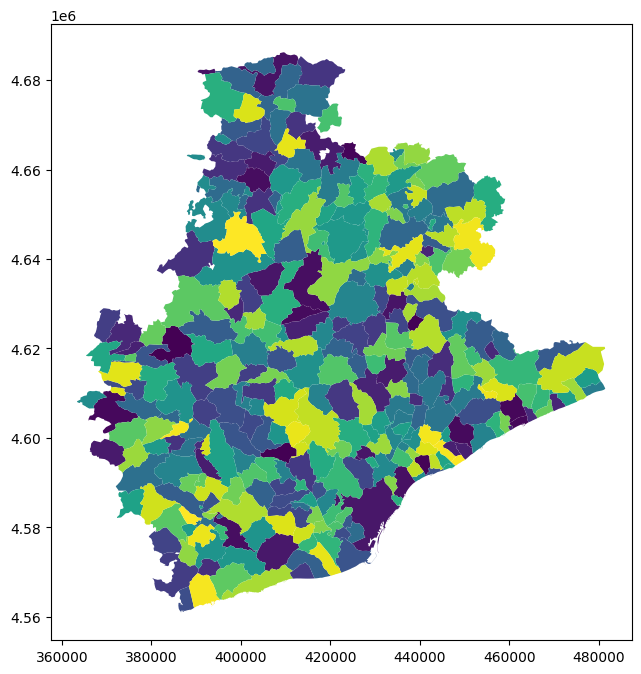

In [19]:
municipi_data = map_data["MUNICIPI"]
municpis_barcelona = municipi_data[municipi_data["NOMPROV"] == "Barcelona"]

ax = municpis_barcelona.plot(
    cmap="viridis",
    figsize=(8,8)
)

## Dades poblacionals

In [28]:
population_name = "t15903202400.csv"
population_directory = "./dades-poblacionals-per-municipi"
populations_path = os.path.join(population_directory, population_name)
populations_data = pd.read_csv(populations_path, sep=";", dtype=str)
display(populations_data.head(5))

,Municipi,Codi,Altitud (m),Superfície (km²),Població
0,Abella de la Conca,250019,956,"78,27",161
1,Abrera,080018,105,"19,94",12981
2,Àger,250024,642,"160,57",608
3,Agramunt,250030,337,"79,65",5592
4,Aguilar de Segarra,080023,480,"43,32",291


In [29]:
populations_data.columns = ["NOMMUNI_", "CODIMUNI", "ALTITUD", "SUPERFICIE", "POBLACIO"]
display(populations_data.head(5))

,NOMMUNI_,CODIMUNI,ALTITUD,SUPERFICIE,POBLACIO
0,Abella de la Conca,250019,956,"78,27",161
1,Abrera,080018,105,"19,94",12981
2,Àger,250024,642,"160,57",608
3,Agramunt,250030,337,"79,65",5592
4,Aguilar de Segarra,080023,480,"43,32",291


## Joining Cartography Dataset to Populational Dataset (Municipi)

In [30]:
display(populations_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NOMMUNI_    947 non-null    object
 1   CODIMUNI    947 non-null    object
 2   ALTITUD     947 non-null    object
 3   SUPERFICIE  947 non-null    object
 4   POBLACIO    947 non-null    object
dtypes: object(5)
memory usage: 37.1+ KB


None

In [24]:
display(municipi_data.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CODIMUNI   947 non-null    object  
 1   NOMMUNI    947 non-null    object  
 2   CAPMUNI    947 non-null    object  
 3   AREAM5000  947 non-null    float64 
 4   CODICOMAR  947 non-null    object  
 5   NOMCOMAR   947 non-null    object  
 6   CAPCOMAR   947 non-null    object  
 7   CODIVEGUE  947 non-null    object  
 8   NOMVEGUE   947 non-null    object  
 9   CAPVEGUE   947 non-null    object  
 10  CODIPROV   947 non-null    object  
 11  NOMPROV    947 non-null    object  
 12  CAPPROV    947 non-null    object  
 13  geometry   947 non-null    geometry
dtypes: float64(1), geometry(1), object(12)
memory usage: 103.7+ KB


None

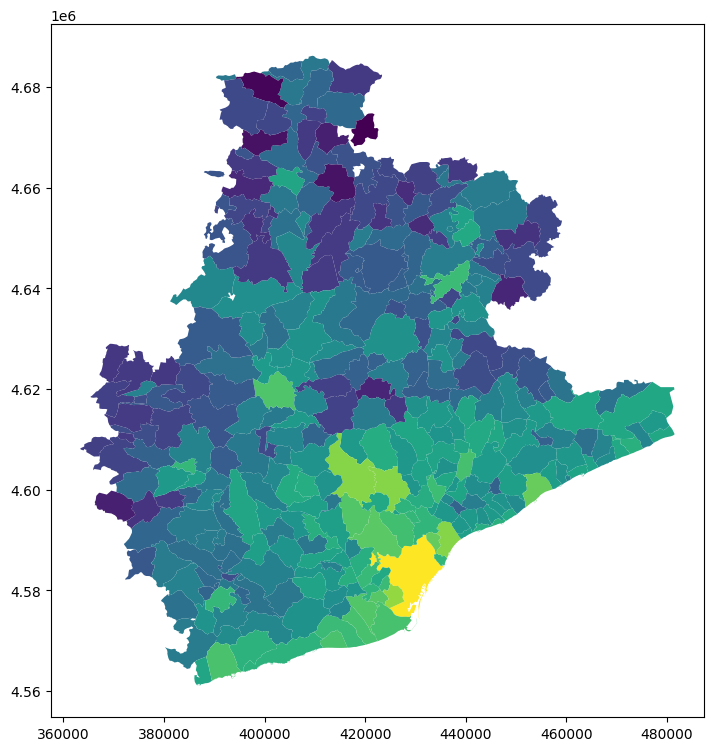

In [63]:
# Assegurem que CODIMUNI és string a tots dos DataFrames
populations_data["CODIMUNI"] = populations_data["CODIMUNI"].astype(str)
municipi_data["CODIMUNI"] = municipi_data["CODIMUNI"].astype(str)

# Ara podem fer el join sense problemes
result = populations_data.join(
    other=municipi_data.set_index("CODIMUNI"),
    on="CODIMUNI"
)

def to_float(s):
    return float(s.replace(",", "."))

result["SUPERFICIE"] = result["SUPERFICIE"].apply(to_float).astype(float)
result["POBLACIO"] = result["POBLACIO"].apply(to_float).astype(float)
result["DENSITY"] = result["POBLACIO"] / result["SUPERFICIE"]
result = result.drop(["AREAM5000", "NOMMUNI_"], axis=1)
result = result[result["NOMPROV"] == "Barcelona"]

result = gpd.GeoDataFrame(result)
ax = result.plot(
    column=np.log(result["POBLACIO"]),
    figsize=(9,9)
)

In [26]:
populations_data.join(other=municipi_data, on="CODIMUNI")

ValueError: You are trying to merge on object and int64 columns for key 'CODIMUNI'. If you wish to proceed you should use pd.concat